In [32]:
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

df = pd.read_csv('austinHousingData.csv')
df_filtered = df[['livingAreaSqFt', 'latestPrice']]

z = np.abs(stats.zscore(df_filtered))
threshold = 2
df_filtered_o = df_filtered[(z < threshold).all(axis=1)]

X = df_filtered_o.livingAreaSqFt
y = df_filtered_o.latestPrice
X = X.to_numpy()
y = y.to_numpy()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc = MinMaxScaler()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_trainscaled=sc.fit_transform(X_train)
X_testscaled=sc.fit_transform(X_test)
y_trainscaled=sc.fit_transform(y_train)
y_testscaled=sc.fit_transform(y_test)

print(X_trainscaled.shape)
print(y_trainscaled.shape)
print(X_testscaled.shape)
print(y_testscaled.shape)

(11684, 1)
(11684, 1)
(2922, 1)
(2922, 1)


The multi testing MSE is:   0.017602933835473195
The multi training MSE is:   0.01683046917734069


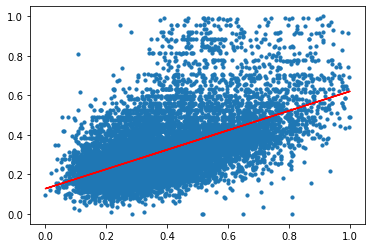

In [34]:
lin_model = LinearRegression()
lin_model.fit(X_trainscaled,y_trainscaled)

y_pred_train = lin_model.predict(X_trainscaled)
y_pred_test = lin_model.predict(X_testscaled)


mse_multi_train = mean_squared_error(y_trainscaled, y_pred_train)
mse_multi_test = mean_squared_error(y_testscaled, y_pred_test)

print("The multi testing MSE is:  ", mse_multi_test)
print("The multi training MSE is:  ", mse_multi_train)

plt.scatter(X_trainscaled, y_trainscaled, s=10)
plt.plot(X_trainscaled, y_pred_train, color='r')
plt.show()